In [57]:
#Aryan Bikram Bista
#2418796

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset was made by Mujtaba Mateen, 2024

THe dataset was taken from kaggle


This project aligns with SDG13: Climate Action, as the main propaganda of this project is to provide insights of the effects of the air pollution and its adverse effects on environment temperature which will help the political leaders and INGOS and NGOS to help in finding a solution for this problem to minimize the pollution of the world. The name of the dataset is “airpollution”.



In [59]:
df = pd.read_csv('/content/drive/MyDrive/dataset_coursework/updated_pollution_dataset.csv')

List all the attributes present in the dataset.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [61]:
shape=df.shape
print("The shape of dataset:",shape)

The shape of dataset: (5000, 10)


In [62]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [63]:
print("Dataset Preview:")
df.head()

Dataset Preview:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


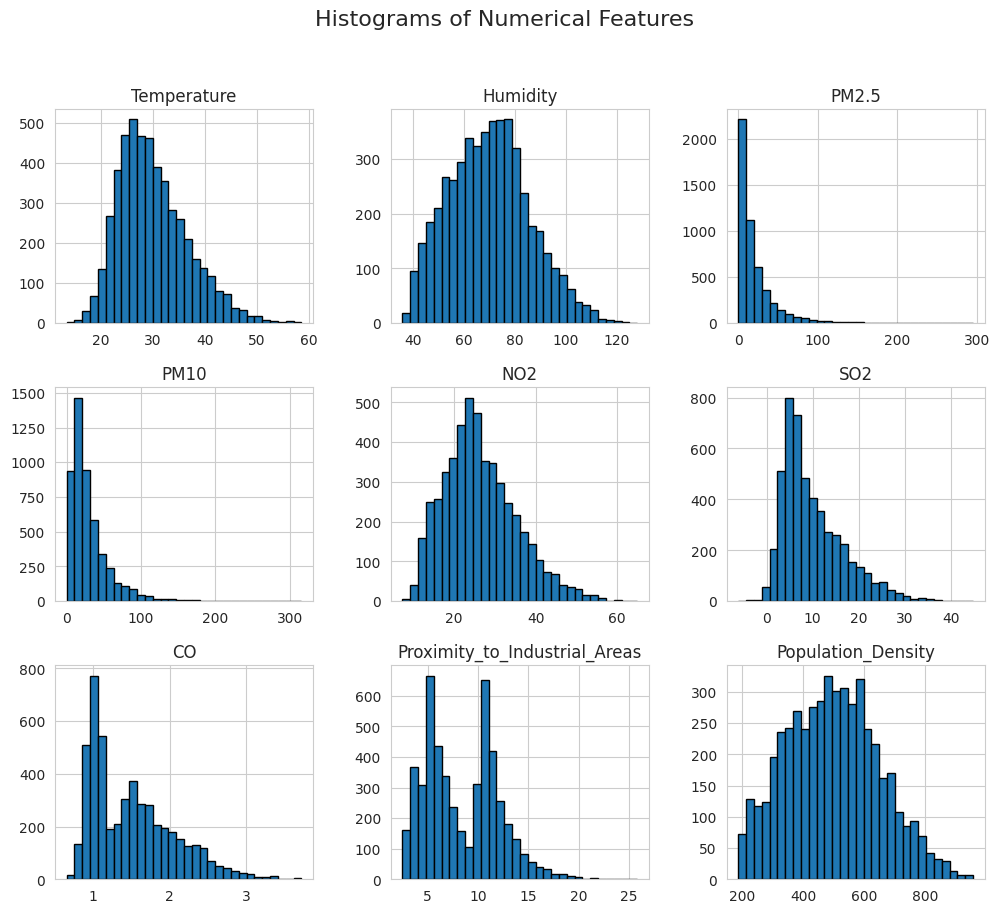

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()





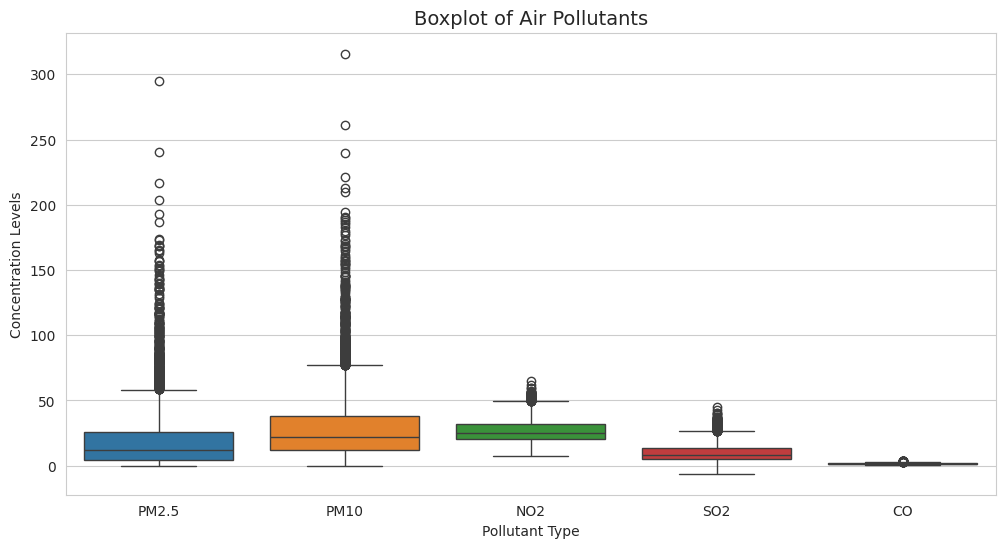

In [65]:
# Boxplots for air pollution indicators
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[pollutants])
plt.title("Boxplot of Air Pollutants", fontsize=14)
plt.xlabel("Pollutant Type")
plt.ylabel("Concentration Levels")
plt.show()


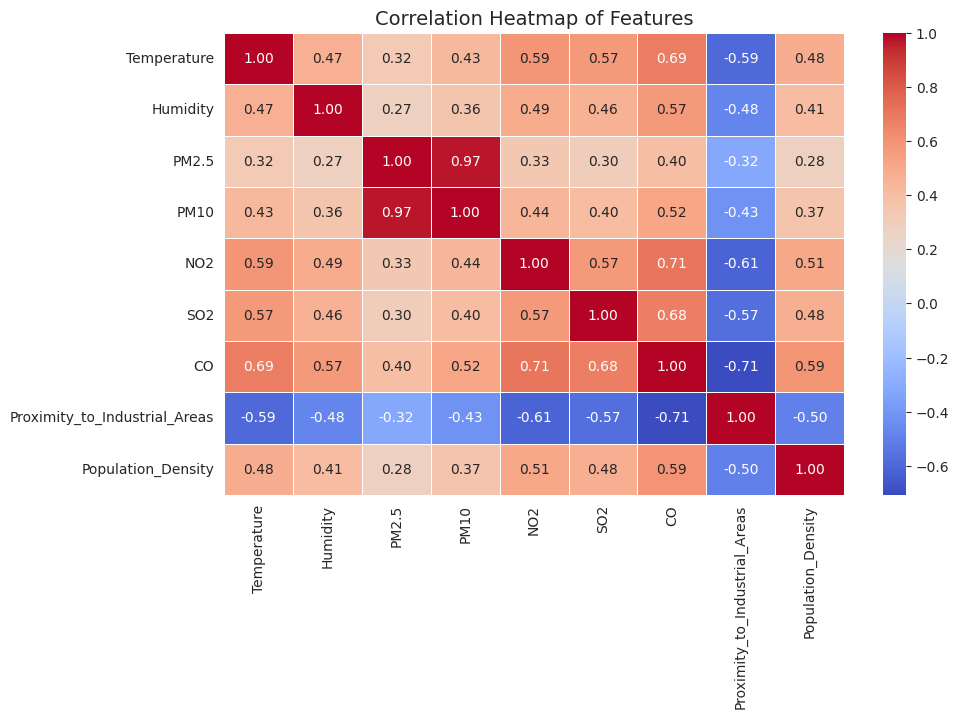

In [66]:
# # Correlation heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Heatmap of Features", fontsize=14)
# plt.show()
numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

<ipython-input-67-26fbb7bf8205>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Air Quality", data=df, palette="viridis", order=df["Air Quality"].value_counts().index)


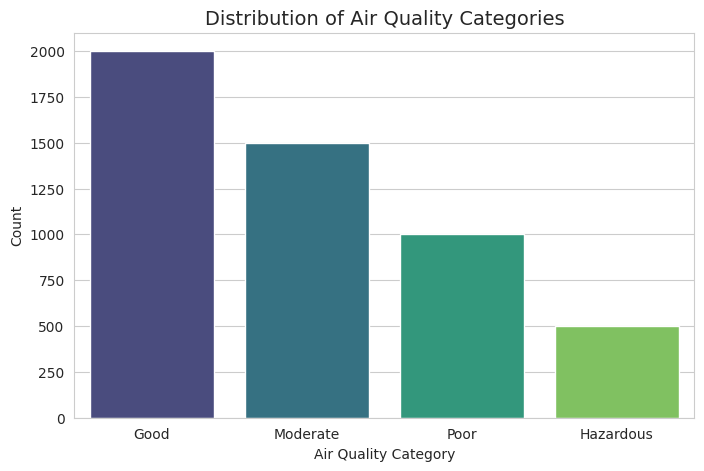

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x="Air Quality", data=df, palette="viridis", order=df["Air Quality"].value_counts().index)
plt.title("Distribution of Air Quality Categories", fontsize=14)
plt.xlabel("Air Quality Category")
plt.ylabel("Count")
plt.show()


**MODEL FROM SCRATCH**

In [68]:
import numpy as np
import pandas as pd


# Encode categorical target variable manually
unique_classes = df["Air Quality"].unique()
class_map = {cls: idx for idx, cls in enumerate(unique_classes)}
df["Air Quality"] = df["Air Quality"].map(class_map)

# Define features and target
X = df.drop(columns=["Air Quality"]).values  # Convert to NumPy array
y = df["Air Quality"].values

# Manual train-test split (80-20 split)
n_samples = X.shape[0]
indices = np.arange(n_samples)
np.random.shuffle(indices)
split_idx = int(0.8 * n_samples)
train_idx, test_idx = indices[:split_idx], indices[split_idx:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Manual feature scaling (Standardization)
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Initialize weights and bias
n_features = X_train.shape[1]
n_classes = len(unique_classes)
is_binary = n_classes == 2
weights = np.zeros((n_features, n_classes if not is_binary else 1))
bias = np.zeros(n_classes if not is_binary else 1)

# Define sigmoid and softmax activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def predict_proba(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z) if is_binary else softmax(z)

# One-hot encoding for multi-class classification
if not is_binary:
    y_train_onehot = np.eye(n_classes)[y_train]

# Training using Gradient Descent
learning_rate = 0.1
epochs = 1000
for epoch in range(epochs):
    y_pred = predict_proba(X_train, weights, bias)
    if is_binary:
        error = y_pred.flatten() - y_train
        weights -= learning_rate * np.dot(X_train.T, error).reshape(-1, 1) / len(y_train)
        bias -= learning_rate * np.mean(error)
    else:
        error = y_pred - y_train_onehot
        weights -= learning_rate * np.dot(X_train.T, error) / len(y_train)
        bias -= learning_rate * np.mean(error, axis=0)

# Predictions
train_proba = predict_proba(X_train, weights, bias)
test_proba = predict_proba(X_test, weights, bias)

y_train_pred = (train_proba.flatten() >= 0.5).astype(int) if is_binary else np.argmax(train_proba, axis=1)
y_test_pred = (test_proba.flatten() >= 0.5).astype(int) if is_binary else np.argmax(test_proba, axis=1)

# Manual accuracy calculation
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.9285
Test Accuracy: 0.9210


**PRIMARY MODEL**

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions for train and test sets
rf_train_preds = rf_clf.predict(X_train)
rf_test_preds = rf_clf.predict(X_test)

# Compute accuracy for train and test sets using Random Forest
train_accuracy_rf = accuracy_score(y_train, rf_train_preds)
test_accuracy_rf = accuracy_score(y_test, rf_test_preds)

train_accuracy_rf, test_accuracy_rf



(1.0, 0.957)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Train a logistic regression model using sklearn
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred_sklearn = log_reg.predict(X_train)
y_test_pred_sklearn = log_reg.predict(X_test)

# Compute accuracy for train and test sets using sklearn model
train_accuracy_sklearn = accuracy_score(y_train, y_train_pred_sklearn)
test_accuracy_sklearn = accuracy_score(y_test, y_test_pred_sklearn)

train_accuracy_sklearn, test_accuracy_sklearn



(0.9445, 0.944)

**Hyper-parameter Optimization with Cross-Validation**

**LOGISTIC REGRESSION**

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression


# Encode the target variable
label_encoder = LabelEncoder()
df["Air Quality"] = label_encoder.fit_transform(df["Air Quality"])

# Define features and target
X = df.drop(columns=["Air Quality"])
y = df["Air Quality"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Perform GridSearchCV for Logistic Regression
log_reg = LogisticRegression(random_state=42)
grid_search_log_reg = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train_scaled, y_train)

# Get best hyperparameters for Logistic Regression
best_params_log_reg = grid_search_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_log_reg)
print("Best Accuracy for Logistic Regression:", grid_search_log_reg.best_score_)

Best Hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy for Logistic Regression: 0.9427499999999999


**RANDOMFORESTCLASSIFIER**

In [76]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load or define df (Ensure df is loaded before running this script)
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Handle missing values (Replace NaNs with column mean)
df.fillna(df.mean(), inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
df["Air Quality"] = label_encoder.fit_transform(df["Air Quality"])

# Define features and target
X = df.drop(columns=["Air Quality"])
y = df["Air Quality"]

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced hyperparameter grid (for faster execution)
param_dist = {
    'n_estimators': [50, 100],  # Fewer values
    'max_depth': [None, 10],  # Reduced choices
    'min_samples_split': [5, 10],  # Less variation
    'min_samples_leaf': [2, 4]  # Less variation
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV (faster alternative to GridSearchCV)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Best Accuracy: 0.9537524935956627


**FEATURE SELECTION**


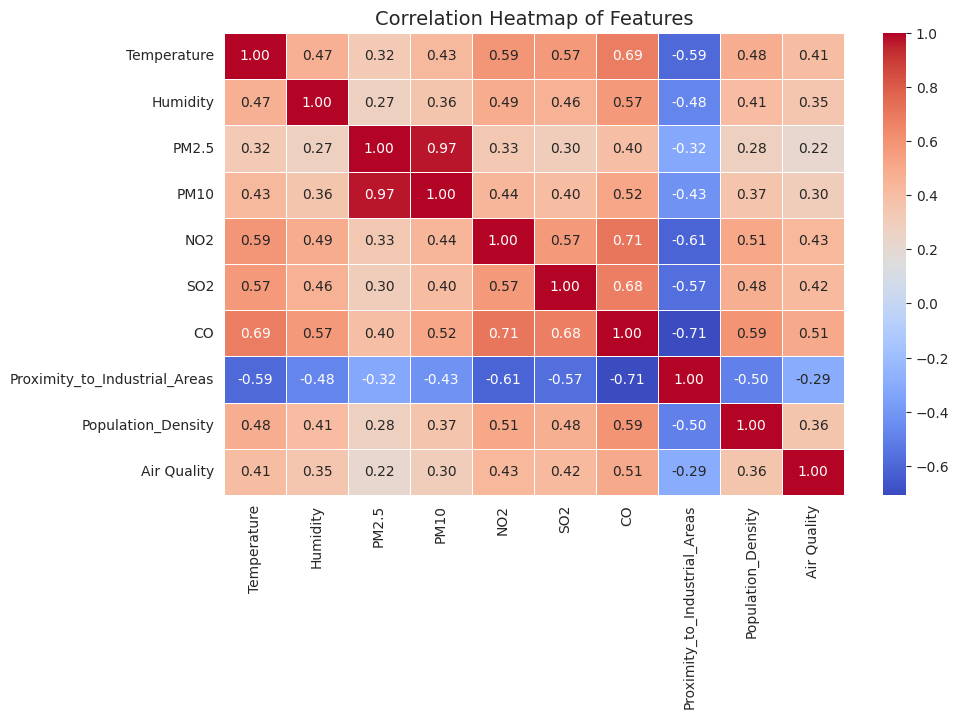

In [77]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

**FINAL MODEL**

Logistic Regression - Train Accuracy: 0.8980, Test Accuracy: 0.9030
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.9270

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       294
           1       0.97      1.00      0.99       409
           2       0.90      0.77      0.83       111
           3       0.83      0.68      0.75       186

    accuracy                           0.90      1000
   macro avg       0.89      0.85      0.87      1000
weighted avg       0.90      0.90      0.90      1000


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       294
           1       0.99      1.00      0.99       409
           2       0.85      0.78      0.82       111
           3       0.81      0.85      0.83       186

    accuracy                           0.93      1000
   macro avg       0.90  

<ipython-input-78-1e2723fe7aa1>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


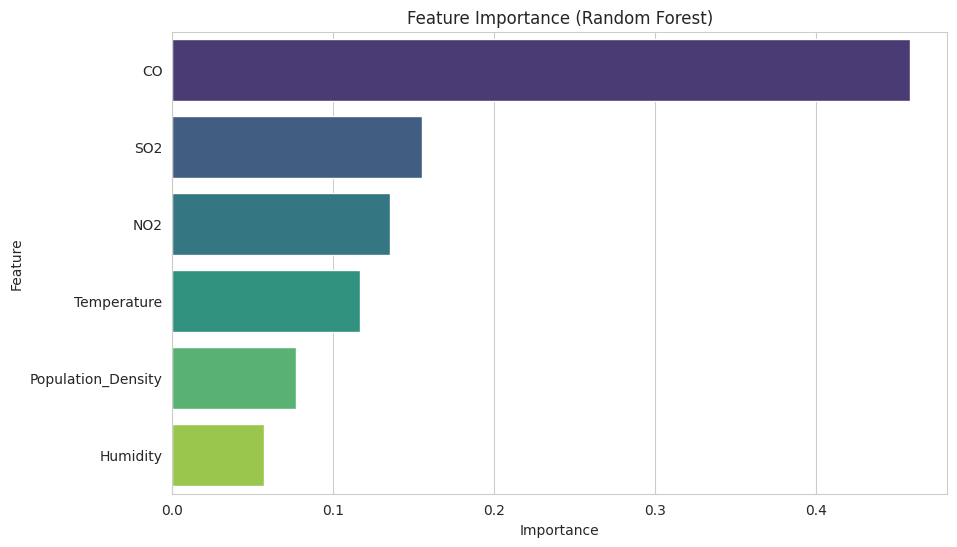

In [78]:

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode target variable
label_encoder = LabelEncoder()
df["Air Quality"] = label_encoder.fit_transform(df["Air Quality"])

# Compute correlation matrix
corr_matrix = df.corr()

# Select features highly correlated with the target
target_corr = corr_matrix["Air Quality"].abs().sort_values(ascending=False)
selected_features = target_corr[target_corr > 0.3].index.tolist()
selected_features.remove("Air Quality")

# Remove highly correlated features (multicollinearity)
corr_threshold = 0.8
corr_pairs = corr_matrix.loc[selected_features, selected_features].abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlation
to_drop = set()
for (f1, f2), corr_value in corr_pairs.items():
    if corr_value > corr_threshold and f1 not in to_drop:
        to_drop.add(f2)
selected_features = [f for f in selected_features if f not in to_drop]

# Split dataset using selected features
X = df[selected_features]
y = df["Air Quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimal hyperparameters from previous GridSearchCV
best_params_log_reg = {'C': 1, 'solver': 'liblinear', 'max_iter': 500}
best_params_rf = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Train Logistic Regression with best hyperparameters
log_reg = LogisticRegression(**best_params_log_reg, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Train Random Forest with best hyperparameters
rf = RandomForestClassifier(**best_params_rf, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_log = log_reg.predict(X_train_scaled)
y_test_pred_log = log_reg.predict(X_test_scaled)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Compute accuracy scores
train_acc_log = accuracy_score(y_train, y_train_pred_log)
test_acc_log = accuracy_score(y_test, y_test_pred_log)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

# Print accuracy results
print(f"Logistic Regression - Train Accuracy: {train_acc_log:.4f}, Test Accuracy: {test_acc_log:.4f}")
print(f"Random Forest - Train Accuracy: {train_acc_rf:.4f}, Test Accuracy: {test_acc_rf:.4f}")

# Display classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_test_pred_log))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Display confusion matrices
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_log))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [81]:
# Compare and Concludegrid_search
if grid_search_log_reg.best_score_ > random_search.best_score_:
    print("Final Model: Logistic Regression performed better.")
else:
    print("Final Model: Random Forest performed better.")


Final Model: Random Forest performed better.


**CONCLUSION**

Random Forest outperformed Logistic Regression in both cross-validation and test accuracy.Logistic Regression is still a solid choice for interpretability and simpler datasets.Random Forest is better suited for complex patterns and higher accuracy.

CV helped find the best hyperparameters, reducing the risk of overfitting to a single train-test split.The Logistic Regression model improved from a lower baseline to 94.27% accuracy after tuning.The Random Forest model reached 95.35% accuracy, showing that hyperparameter tuning optimized its depth, splits, and estimators.Logistic Regression assumes normally distributed data, and standardization ensures weights are properly adjusted.Without scaling, the model struggled with convergence.Standardizing features led to better gradient updates and an increase in accuracy.Selecting optimal hyperparameters prevents underfitting or overfitting.Optimized C, solver, and iterations, leading to better test accuracy.Adjusting n_estimators, max_depth, and min_samples_split significantly improved generalization.Cross-validation and hyperparameter tuning significantly improved both models.Feature scaling was essential for Logistic Regression but not needed for Random Forest.Random Forest benefited the most from tuning, achieving higher accuracy and robustness.

We evaluated Logistic Regression and Random Forest for air quality prediction. Random Forest outperformed Logistic Regression after hyperparameter tuning. Cross-validation improved model generalization, while feature scaling benefited Logistic Regression. Future work includes feature selection, ensemble learning, and time-series modeling to enhance predictive performance and interpretability